# Ensemble Learning

## Topics:
* Voting Classifiers
* Bagging and Pasting
    * Random Forest
    * Extra trees
    * Feature Importance
* Boosting
    * AdaBoost
    * Gradient Boosting
* Stacking

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:,:]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**1. Voting Classifiers**

* *Wisdom of the crowd*: The aggregated answers is better than an expert answer. 
You will often get better predictions with a group of predictors (ensemble) than with the best individual predictor.


* *Independence*: Ensemble methods work best when the predictors are as independent from one another as posible (uncorrelated errors). Different algorithms, Different features... 

[Ensemble Learning simple guide](https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2)

**2. Bagging and Pasting**

Another approach is to use the same training algorithm for every predictor and train them on different subsets of the training set. When sampling is performed *with replacement*, this method is called **bagging** (bootstrap aggregating).

About 37% of the training instances are not sampled. They are called *out-of-bag* (oob) and we can test our model on them with *oob_score* set to True

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=1, oob_score=True
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.oob_score_

0.9428571428571428

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

**Random Patches and Random Subspaces**

* Random Patches: Instance sampling + Feature sampling. Each predictor will be trained on a random subspace of the input features
    
* Random Subspaces: Keeping all training instances (bootstrap=False, max_samples=1) but sampling features (bootstrap_features=True, and/or max_features<1)

**Random Forest**

The RF introduces a extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best features among a random subset of features.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,n_jobs=1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [20]:
accuracy_score(y_pred_rf, y_test)

1.0

**Extra Trees *(Extremely Randomized Trees Ensemble)***

It is possible to make trees even more random by using random thresholds for each feature rather than searching for the best possible thresholds. (more bias for a lower variance)

**Feature Importance**

Another great quality of Random Forest is to  measure the relative importance of each feature.

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.08702373153320195
sepal width (cm) 0.02493844411879562
petal length (cm) 0.4516874347988412
petal width (cm) 0.4363503895491612


**3. Boosting**

* Refers to any Ensemble method that can combine several weak learners into a strong one.
* Train predictors sequentially, each trying to correct its predecessor.
* It cannot be parallelized (partially)


**Adaboost**

The technique used by AdaBoost is to pay a bit more attention to the training instances that the predecessor underfitted adding more predictors to the sequence.

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

**Gradient Boosting**

This technique works by sequentially adding predictors to an ensemble, each one predicting the *residual errors* made by the previous predictor.

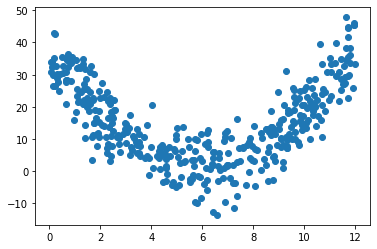

In [99]:
import numpy as np
import matplotlib.pyplot as plt
X = 12 * np.random.rand(400,1)
y = 2 + ((X - 6)**2) + 6*np.random.randn(400,1)
plt.scatter(X, y)
plt.show()

In [100]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [101]:
y1 = tree_reg1.predict(X)
y2 = y - y1[0]
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [108]:
y2p = tree_reg2.predict(X)
y3 = y2 - y2p[0]
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)
y3p = tree_reg3.predict(X)

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)
y4 = gbrt.predict(X)

//anaconda3/envs/mlrepo/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, '4')

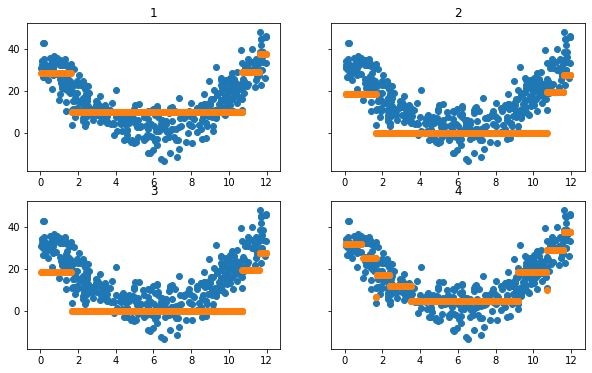

In [113]:
f, axs = plt.subplots(2, 2, sharey=True, figsize=(10,6))
axs[0,0].scatter(X, y)
axs[0,0].scatter(X, y1)
axs[0,0].set_title('1')
axs[0,1].scatter(X, y)
axs[0,1].scatter(X, y2p)
axs[0,1].set_title('2')
axs[1,0].scatter(X, y)
axs[1,0].scatter(X, y3p)
axs[1,0].set_title('3')
axs[1,1].scatter(X, y)
axs[1,1].scatter(X, y4)
axs[1,1].set_title('4')

**XGBoost**

Extreme Gracient Boosting Is an optimized implementation of *Gradient Boosting*

Look for more documentation: [Ensemble Trees: XGBoost](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)